<a href="https://colab.research.google.com/github/stanimman/Lectures/blob/master/Linear_regression_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### Linear Regression

In [13]:
!git clone https://github.com/jdwittenauer/ipython-notebooks.git

Cloning into 'ipython-notebooks'...
remote: Enumerating objects: 613, done.
remote: Total 613 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (613/613), 33.01 MiB | 33.37 MiB/s, done.
Resolving deltas: 100% (309/309), done.


In [16]:
!ls ipython-notebooks/data

bird_small.mat	  ex3data1.mat	  ex7data1.mat	       movie_ids.txt
bird_small.png	  ex3weights.mat  ex7data2.mat	       spamSample1.txt
emailSample1.txt  ex4data1.mat	  ex7faces.mat	       spamSample2.txt
emailSample2.txt  ex4weights.mat  ex8data1.mat	       spamTest.mat
ex1data1.txt	  ex5data1.mat	  ex8data2.mat	       spamTrain.mat
ex1data2.txt	  ex6data1.mat	  ex8_movieParams.mat  stock_data.csv
ex2data1.txt	  ex6data2.mat	  ex8_movies.mat       vocab.txt
ex2data2.txt	  ex6data3.mat	  manning.csv


In [19]:
import pandas as pd
path = 'ipython-notebooks/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Years_of_Experience', 'Salary_in_lakhs'])
data.head()

,Years_of_Experience,Salary_in_lakhs
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


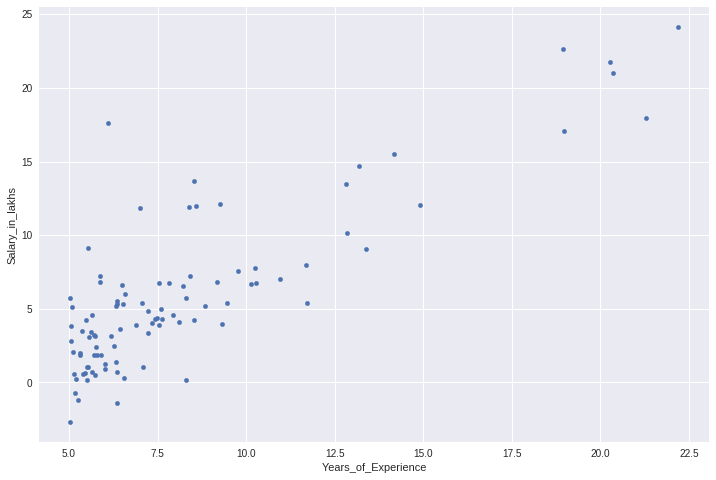

In [21]:
data.plot(kind='scatter', x='Years_of_Experience', y='Salary_in_lakhs', figsize=(12,8))

In [0]:
import numpy as np
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
x = np.array(X[:, 0].A1)
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

Text(0.5,1,'Predicted Salary_in_lakhs vs. Years_of_Experience')

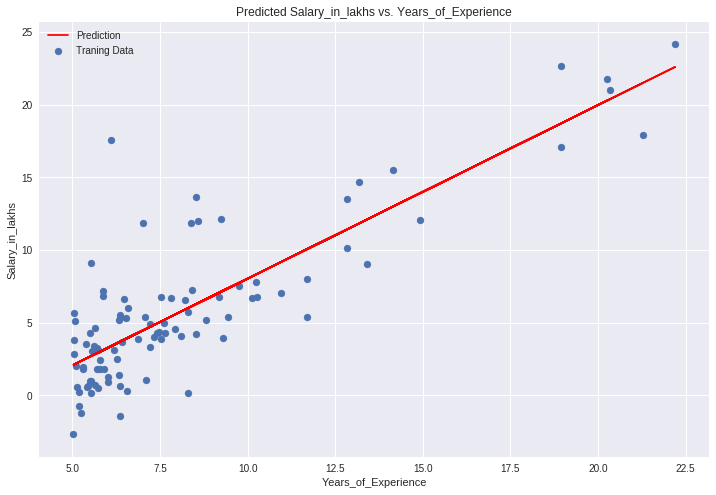

In [45]:
import matplotlib.pyplot as plt
x = np.array(X[:, 0].A1) # A1 change the shape and flattenns the matrix
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Years_of_Experience, data.Salary_in_lakhs, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Years_of_Experience')
ax.set_ylabel('Salary_in_lakhs')
ax.set_title('Predicted Salary_in_lakhs vs. Years_of_Experience')

In [47]:
path = 'ipython-notebooks/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_pred = model.predict(X)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [[  139.21067402 -8738.01911233]]
Mean squared error: 4086560101.21
Variance score: 0.73


In [59]:
!wget https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file

--2018-12-13 09:12:47--  https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file
Resolving datahack.analyticsvidhya.com (datahack.analyticsvidhya.com)... 35.154.159.229
Connecting to datahack.analyticsvidhya.com (datahack.analyticsvidhya.com)|35.154.159.229|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /oidc/authenticate/?next=/contest/practice-problem-big-mart-sales-iii/download/train-file [following]
--2018-12-13 09:12:48--  https://datahack.analyticsvidhya.com/oidc/authenticate/?next=/contest/practice-problem-big-mart-sales-iii/download/train-file
Reusing existing connection to datahack.analyticsvidhya.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://id.analyticsvidhya.com/openid/authorize?nonce=706eRF2HZdxFq5xqflMKasYHnEds7ddx&state=o6vSWtcXsh8Aa5PwSJpk14ZJdASVi5x5&scope=openid+email+profile&redirect_uri=http%3A%2F%2Fdatahack.analyticsvidhya.com%2Foidc%2Fcallback%2F&client_id=1

In [60]:
!ls

data  ipython-notebooks  sample_data  train-file


### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

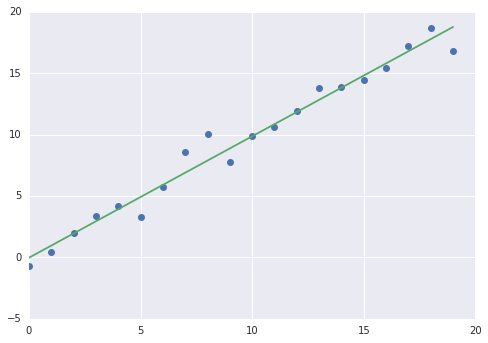

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

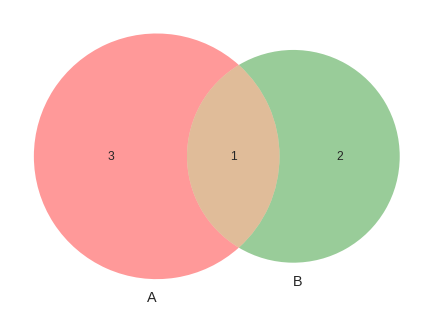

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).